<div style="text-align:right">Justine Charrel - Master 2 Internship</div>
This script plot the cloud fraction along latitude-altitude and low cloud cover for CALIPSO-GOCCP and LMDZ6A.

### IMPORT

In [1]:
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

### READ DATA - Cloud fraction

In [2]:
# CALIPSO-GOCCP
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/CALIPSO/'
ncfile_obs=path+"CALIPSO_3DCloudFraction_climato_2008-2021_except_2016_CFMIP2_sat_3.1.4_r144x90.nc"
nc_obs_cf_annual = netCDF4.Dataset(ncfile_obs)

path = '/home/jcharrel/Documents/M2_Internship_LMD/data/CALIPSO/'
ncfile_obs=path+"CALIPSO_3DCloudFraction_seasonal_2008-2022_CFMIP2_sat_3.1.4_r144x90.nc"
nc_obs_cf_seasonal = netCDF4.Dataset(ncfile_obs)

ncfile_alt_mid=path+"CALIPSO_3DCloudFraction_alt_mid.nc"
nc_alt_mid = netCDF4.Dataset(ncfile_alt_mid)

In [3]:
# LMDZ6A
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/LMDZ6A/'
ncfile_lmdz6a=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmthCOSP_3Dclcalipso_nan_r144x90.nc"
nc_lmdz6a = netCDF4.Dataset(ncfile_lmdz6a)

In [4]:
# MASK
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/LMDZ6A/'
ncfile_mask=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmth_phis_r144x90.nc"
nc_mask = netCDF4.Dataset(ncfile_mask)

In [5]:
# GRID
lon = nc_obs_cf_annual.variables['lon'][:]
lat = nc_obs_cf_annual.variables['lat'][:]

lat_id = (lat <= -60) 
lat = lat[lat_id]

lon_est = lon[lon<=150]
lon_est_id = lon<=150

alt_mid = nc_alt_mid.variables['alt_mid'][:] #levels

### LOAD VARIABLES - CLOUD FRACTION

In [6]:
# ALTITUDE
g = 9.81 # m/s
alt_est_mean = np.mean(nc_mask.variables['phis'][:,lat_id,lon_est_id]/g,axis=(0,2)) #m

In [7]:
# LONGITUDINAL ANNUAL MEAN
clobs_est_mean = np.mean(nc_obs_cf_annual.variables['clcalipso'][0,:,lat_id,lon_est_id], axis=2)
cllmdz6a_est_mean = np.mean(nc_lmdz6a.variables['clcalipso'][:,:,lat_id,lon_est_id], axis=(0,3))

cl_data_annual = np.ma.dstack((clobs_est_mean,cllmdz6a_est_mean))
diff_data_annual = np.ma.dstack((cllmdz6a_est_mean-clobs_est_mean))

# LONGITUDINAL MEAN FOR SEASONAL MEAN
clobs_est_mean = np.mean(nc_obs_cf_seasonal.variables['clcalipso'][:,:,lat_id,lon_est_id], axis=3)
cllmdz6a_est_mean = np.mean(nc_lmdz6a.variables['clcalipso'][:,:,lat_id,lon_est_id], axis=3)

In [8]:
# SEASONAL MEAN

# CALIPSO-GOCCP
clobs_est_mean_DJF = np.mean(clobs_est_mean[[0,1,11],:,:], axis=0)
clobs_est_mean_MAM = np.mean(clobs_est_mean[[2,3,4],:,:], axis=0)
clobs_est_mean_JJA = np.mean(clobs_est_mean[[5,6,7],:,:], axis=0)
clobs_est_mean_SON = np.mean(clobs_est_mean[[8,9,10],:,:], axis=0)

# LMDZ6A
cllmdz6a_est_mean_DJF = np.mean(cllmdz6a_est_mean[[0,1,11],:,:], axis=0)
cllmdz6a_est_mean_MAM = np.mean(cllmdz6a_est_mean[[2,3,4],:,:], axis=0)
cllmdz6a_est_mean_JJA = np.mean(cllmdz6a_est_mean[[5,6,7],:,:], axis=0)
cllmdz6a_est_mean_SON = np.mean(cllmdz6a_est_mean[[8,9,10],:,:], axis=0)

cl_data_DJF = np.ma.stack((clobs_est_mean_DJF,cllmdz6a_est_mean_DJF))
cl_data_MAM = np.ma.stack((clobs_est_mean_MAM,cllmdz6a_est_mean_MAM))
cl_data_JJA = np.ma.stack((clobs_est_mean_JJA,cllmdz6a_est_mean_JJA))
cl_data_SON = np.ma.stack((clobs_est_mean_SON,cllmdz6a_est_mean_SON))
cl_data_seasonal = np.ma.stack((cl_data_DJF,cl_data_MAM,cl_data_JJA,cl_data_SON))

# DIFFERENCE
diff_data_DJF = np.ma.stack((cllmdz6a_est_mean_DJF-clobs_est_mean_DJF))
diff_data_MAM = np.ma.stack((cllmdz6a_est_mean_MAM-clobs_est_mean_MAM))
diff_data_JJA = np.ma.stack((cllmdz6a_est_mean_JJA-clobs_est_mean_JJA))
diff_data_SON = np.ma.stack((cllmdz6a_est_mean_SON-clobs_est_mean_SON))
diff_data_seasonal = np.ma.stack((diff_data_DJF,diff_data_MAM,diff_data_JJA,diff_data_SON))

### READ DATA - Cloud cover

In [9]:
# CALIPSO-GOCCP
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/CALIPSO/'
ncfile_obs=path+"CALIPSO_2DCloudCover_seasonal_2008-2022_CFMIP2_sat_3.1.4_r144x90.nc"
nc_obs_cc_seasonal = netCDF4.Dataset(ncfile_obs)

ncfile_obs=path+"CALIPSO_2DCloudCover_climato_2008-2021_except_2016_CFMIP2_sat_3.1.4_r144x90.nc"
nc_obs_cc_annual = netCDF4.Dataset(ncfile_obs)

In [10]:
# LMDZ6A
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/LMDZ6A/'
ncfile_lmdz6a=path+'LmdzOr6Actrl_calipso_r144x90.nc'
nc_lmdz6a = netCDF4.Dataset(ncfile_lmdz6a)

In [11]:
# MASK
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/LMDZ6A/'
ncfile_mask=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmth_phis_r144x90.nc"
nc_mask = netCDF4.Dataset(ncfile_mask)

### LOAD VARIABLES - Cloud cover

In [12]:
# CALIPSO-GOCCP
cllobs = nc_obs_cc_seasonal.variables['cllcalipso'][:,lat_id,lon_est_id]
cllobs_annual = nc_obs_cc_annual.variables['cllcalipso'][:,lat_id,lon_est_id]

# LMDZ6A
clllmdz6a = nc_lmdz6a.variables['cllcalipso'][:,lat_id,lon_est_id]

In [13]:
# MASK LMDZ6A WHERE THERE IS NO OBS DATA
mask_lat_obs_cll = np.where(cllobs.mask == True, 1, np.nan)
clllmdz6a = np.ma.masked_where(mask_lat_obs_cll >=0, clllmdz6a)

In [14]:
# SELECT SEASONS AND MEAN 

# CALIPSO-GOCCP
cllobs_DJF = np.mean(np.mean(cllobs, axis=2)[[0,1,11],:], axis=0)
cllobs_MAM = np.mean(np.mean(cllobs, axis=2)[[2,3,4],:], axis=0)
cllobs_JJA = np.mean(np.mean(cllobs, axis=2)[[5,6,7],:], axis=0)
cllobs_SON = np.mean(np.mean(cllobs, axis=2)[[8,9,10],:], axis=0)
cllobs_seasons = np.ma.dstack((cllobs_DJF, cllobs_MAM, cllobs_JJA, cllobs_SON))
cllobs_annual = np.mean(cllobs_annual, axis=(0,2))

# LMDZ6A
clllmdz6a_DJF = np.mean(np.mean(clllmdz6a, axis=2)[[0,1,11],:], axis=0)
clllmdz6a_MAM = np.mean(np.mean(clllmdz6a, axis=2)[[2,3,4],:], axis=0)
clllmdz6a_JJA = np.mean(np.mean(clllmdz6a, axis=2)[[5,6,7],:], axis=0)
clllmdz6a_SON = np.mean(np.mean(clllmdz6a, axis=2)[[8,9,10],:], axis=0)
clllmdz6a_seasons = np.ma.dstack((clllmdz6a_DJF, clllmdz6a_MAM, clllmdz6a_JJA, clllmdz6a_SON))
clllmdz6a_annual = np.mean(clllmdz6a, axis=(0,2))

In [18]:
alt_mid

masked_array(data=[ 0.24      ,  0.71999997,  1.2       ,  1.6800001 ,
                    2.16      ,  2.64      ,  3.12      ,  3.6       ,
                    4.08      ,  4.5600004 ,  5.04      ,  5.5200005 ,
                    6.        ,  6.4799995 ,  6.96      ,  7.4399996 ,
                    7.92      ,  8.4       ,  8.88      ,  9.360001  ,
                    9.84      , 10.32      , 10.8       , 11.280001  ,
                   11.76      , 12.24      , 12.719999  , 13.2       ,
                   13.68      , 14.16      , 14.639999  , 15.12      ,
                   15.6       , 16.08      , 16.56      , 17.04      ,
                   17.52      , 18.        , 18.48      , 18.96      ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [66]:
plot = np.mean(nc_obs_cf_seasonal.variables['clcalipso'][2:4,5,lat_id,lon_est_id], axis=0)*100

In [67]:
np.shape(plot)

(15, 61)

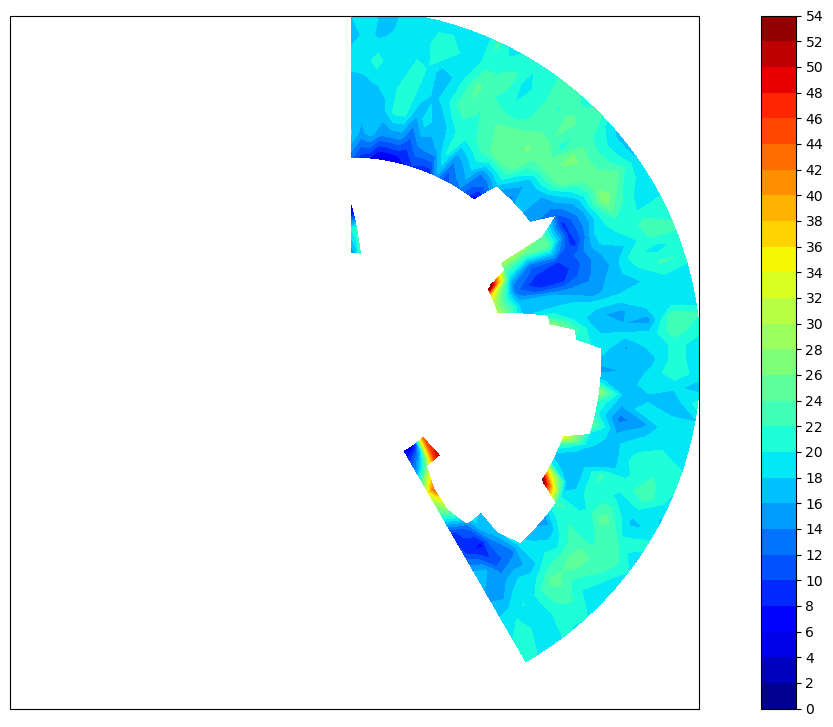

In [72]:
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
fig, ax = plt.subplots(figsize=(16,9), nrows=1, ncols=1, subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=0)})
clevs1 = np.arange(0,56,2)
cmap = 'jet'
cs1 = ax.contourf(lon_est, lat, plot, clevs1, transform=ccrs.PlateCarree(), cmap=cmap)
ax.set_extent([-180, 180, np.min(lat), np.max(lat)], ccrs.PlateCarree())
cb1 = fig.colorbar(cs1, ticks=clevs1)

### PLOT FIGURE

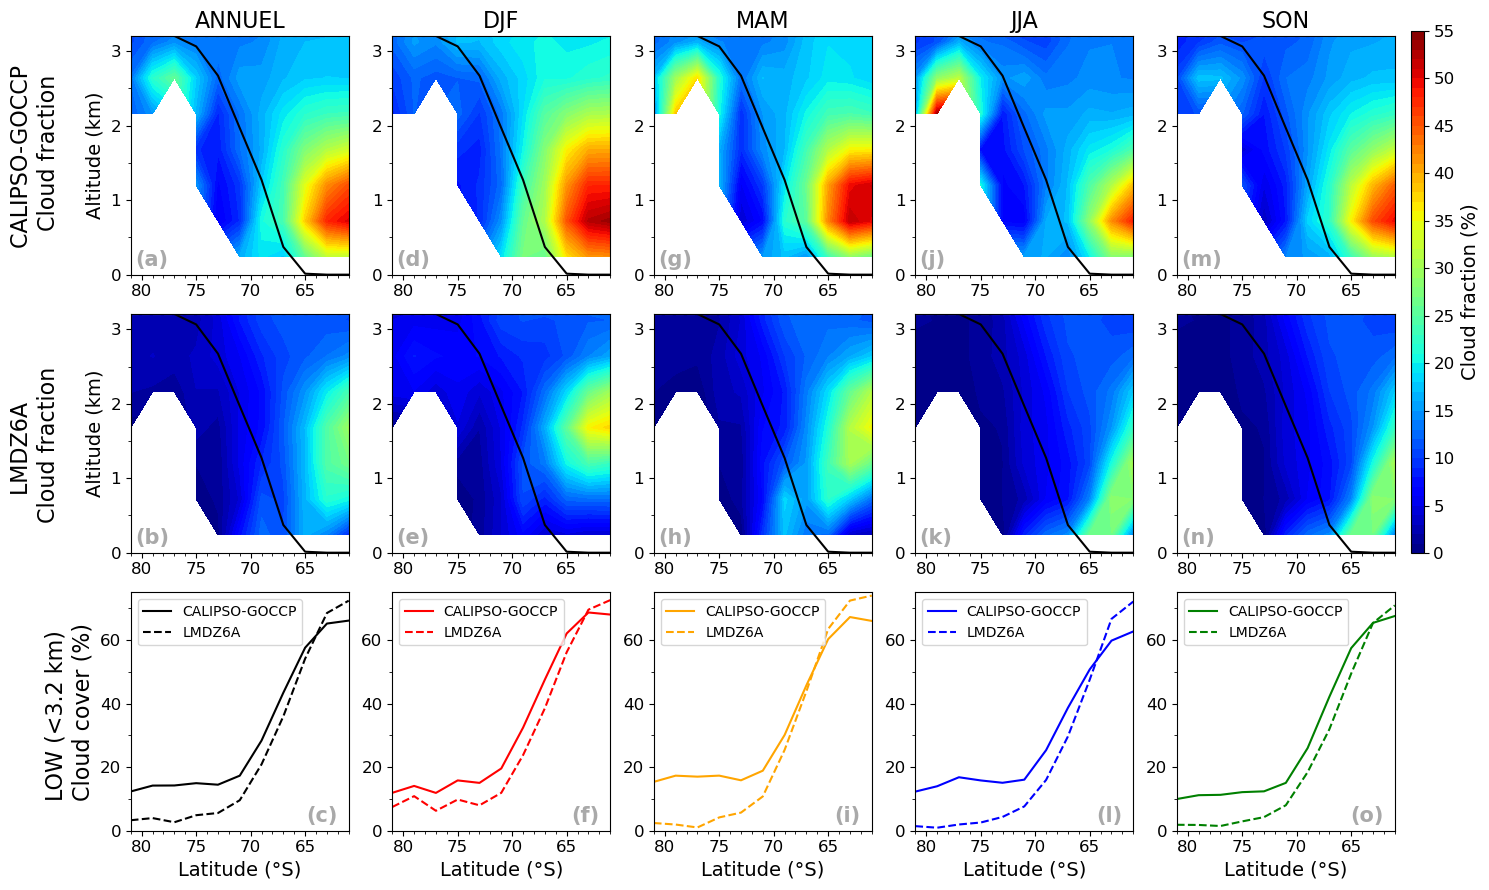

In [25]:
fig, axes = plt.subplots(figsize=(16,9), nrows=3, ncols=5)

fig.text(0.04, 0.825, 'CALIPSO-GOCCP \nCloud fraction', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.04, 0.5, 'LMDZ6A \nCloud fraction', fontsize=16, va='center', ha='center', rotation='vertical')

alphabet = 'adgjmbehkncfilo'
lat_positive = -lat
pltcounter = 0
for idx,plotid in enumerate(axes.flat):
    pltcounter = pltcounter + 1
    if pltcounter == 1 :
        clplot = cl_data_annual[:,:,0]*100
        plotid.set_title('ANNUEL', size=16)
    if pltcounter == 2 :
        clplot = cl_data_seasonal[0,0,:,:]*100
        plotid.set_title('DJF', size=16)
    if pltcounter == 3 :
        clplot = cl_data_seasonal[1,0,:,:]*100
        plotid.set_title('MAM', size=16)
    if pltcounter == 4 :
        clplot = cl_data_seasonal[2,0,:,:]*100
        plotid.set_title('JJA', size=16)
    if pltcounter == 5 :
        clplot = cl_data_seasonal[3,0,:,:]*100
        plotid.set_title('SON', size=16)
    if pltcounter == 6 :
        clplot = cl_data_annual[:,:,1]*100
    if pltcounter == 7 :
        clplot = cl_data_seasonal[0,1,:,:]*100
    if pltcounter == 8 :
        clplot = cl_data_seasonal[1,1,:,:]*100
    if pltcounter == 9 :
        clplot = cl_data_seasonal[2,1,:,:]*100
    if pltcounter == 10 :
        clobsplot = cl_data_seasonal[3,1,:,:]*100
    if pltcounter == 11 :
        plotid.set_ylabel('LOW (<3.2 km) \nCloud cover (%)', size=16)
        clobsplot = cllobs_annual*100
        cllmdz6aplot = clllmdz6a_annual*100
        color='k'
    if pltcounter == 12 :
        clobsplot = cllobs_seasons[0,:,0]*100
        cllmdz6aplot = clllmdz6a_seasons[0,:,0]*100
        color='r'
    if pltcounter == 13 :
        clobsplot = cllobs_seasons[0,:,1]*100
        cllmdz6aplot = clllmdz6a_seasons[0,:,1]*100
        color='orange'
    if pltcounter == 14 :
        clobsplot = cllobs_seasons[0,:,2]*100
        cllmdz6aplot = clllmdz6a_seasons[0,:,2]*100
        color='b'
    if pltcounter == 15 :
        clobsplot = cllobs_seasons[0,:,3]*100
        cllmdz6aplot = clllmdz6a_seasons[0,:,3]*100
        color='g'
    if pltcounter in [1,6]: 
        plotid.set_ylabel('Altitude (km)', size=14)
    if pltcounter < 11 :
        clevs1 = np.arange(0,56,1)
        cmap='jet'
        cs1 = plotid.contourf(lat_positive, alt_mid, clplot, clevs1, cmap=cmap)
        plotid.plot(lat_positive, alt_est_mean*1e-3, c='k')
        plotid.set_ylim(0,3.2)
        #plotid.contour(lat, alt_mid, clplot, levels=[10], colors='w')
        #plotid.contour(lat, alt_mid, clplot, levels=[5], linestyles=':', colors='w')
        plotid.axhline(3.2, c='w',linestyle='--')
        plotid.axhline(6.5, c='w',linestyle='--')
        plotid.yaxis.set_major_locator(MultipleLocator(1))
        plotid.yaxis.set_minor_locator(MultipleLocator(0.5))
        plotid.annotate(f'({alphabet[idx]})', xy=(0.02, 0.02), xycoords='axes fraction', color='darkgrey', fontsize=15, weight='bold', ha='left', va='bottom')
    if pltcounter >= 11 :
        plotid.set_xlabel('Latitude (°S)', size=14)
        plotid.plot(lat_positive,clobsplot, c=color, label='CALIPSO-GOCCP')
        plotid.plot(lat_positive,cllmdz6aplot, '--', c=color, label='LMDZ6A')
        plotid.set_ylim(0,75)
        plotid.yaxis.set_minor_locator(MultipleLocator(10))
        plotid.legend()
        plotid.annotate(f'({alphabet[idx]})', xy=(0.95, 0.02), xycoords='axes fraction', color='darkgrey', fontsize=15, weight='bold', ha='right', va='bottom')
        
    plotid.set_xlim(81,61)
    plotid.xaxis.set_major_locator(MultipleLocator(5))
    plotid.xaxis.set_minor_locator(MultipleLocator(1))
    plotid.tick_params(axis='both', labelsize=12)

fig.tight_layout()
fig.subplots_adjust(right=0.89, left=0.1, wspace=0.2)
cbar_ax = fig.add_axes([0.9, 0.38, 0.008, 0.58])
cb1 = fig.colorbar(cs1, cax=cbar_ax, ticks=np.arange(0,56,5))
cb1.ax.tick_params(labelsize=12)
cb1.set_label('Cloud fraction (%)', fontsize=14)
path_fig = '/home/jcharrel/Documents/M2_Internship_LMD/figures/2DCloudCover_3DCloudFraction/'
fig.savefig(path_fig+'2DCloudCover_3DCloudFraction_east_low.png',dpi=300,bbox_inches='tight')

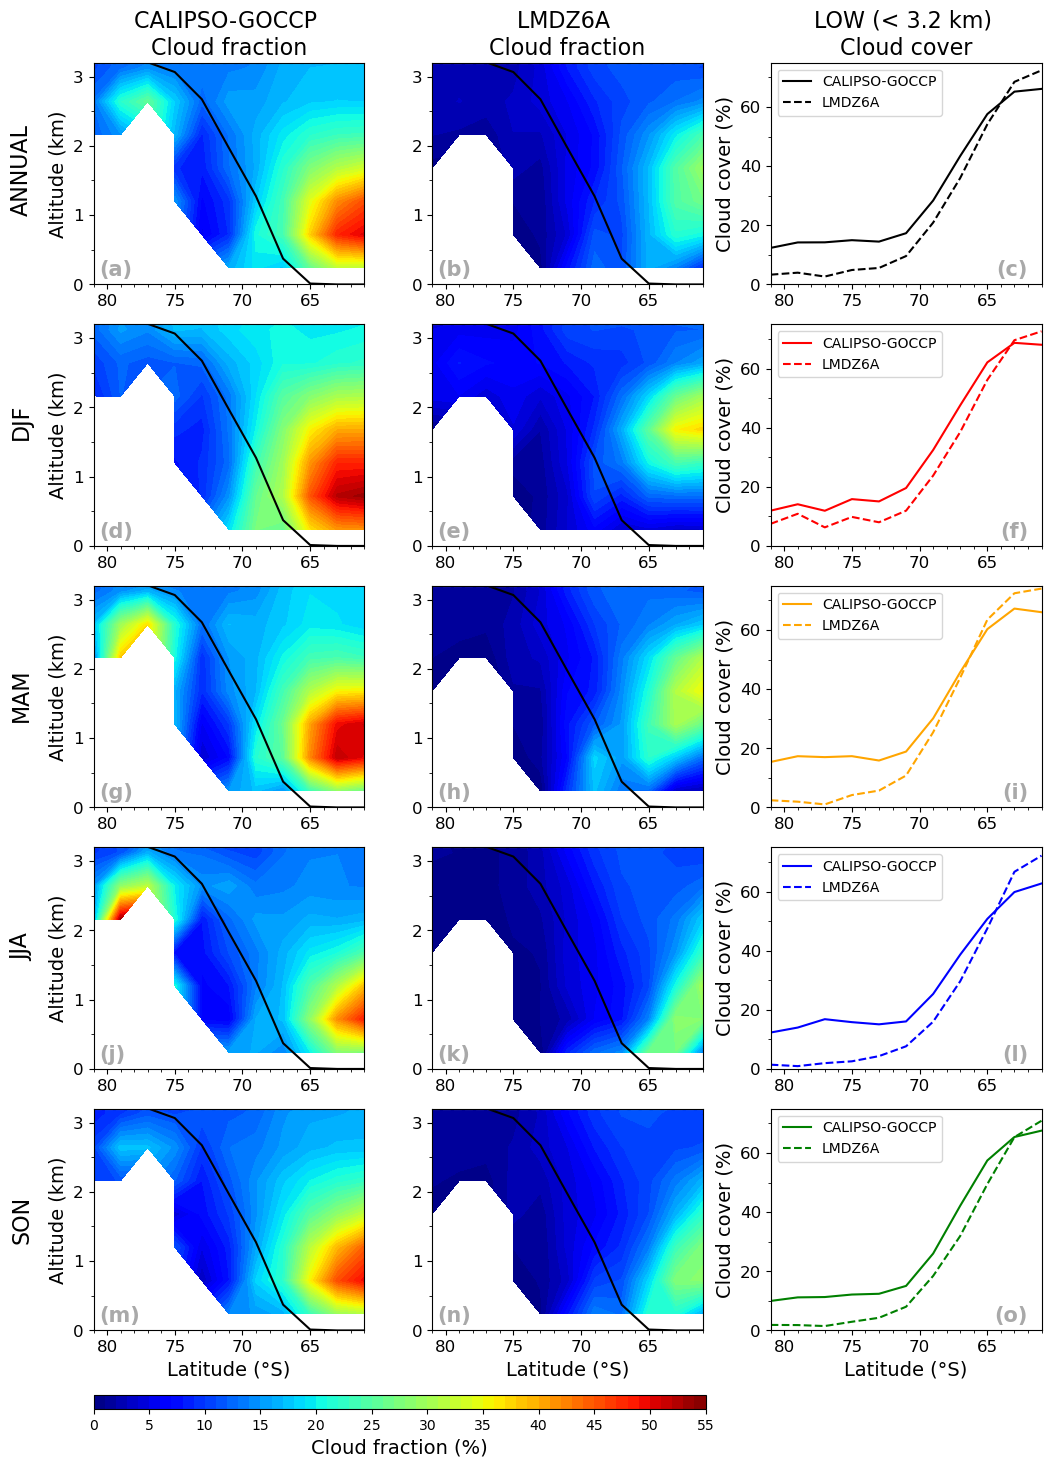

In [80]:
fig, axes = plt.subplots(figsize=(12,14), nrows=5, ncols=3, gridspec_kw={'width_ratios': [1, 1, 1]})

fig.text(0.04, 0.875, 'ANNUAL', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.04, 0.695, 'DJF', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.04, 0.5, 'MAM', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.04, 0.32, 'JJA', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.04, 0.125, 'SON', fontsize=16, va='center', ha='center', rotation='vertical')

alphabet = 'abcdefghijklmnopqrstuvwxyz'
lat_positive = -lat
pltcounter = 0
for idx,plotid in enumerate(axes.flat):
    pltcounter = pltcounter + 1
    if pltcounter == 1 :
        clplot = cl_data_annual[:,:,0]*100
        plotid.set_title('CALIPSO-GOCCP \nCloud fraction', size=16)
    if pltcounter == 4 :
        clplot = cl_data_seasonal[0,0,:,:]*100
    if pltcounter == 7 :
        clplot = cl_data_seasonal[1,0,:,:]*100
    if pltcounter == 10 :
        clplot = cl_data_seasonal[2,0,:,:]*100
    if pltcounter == 13 :
        clplot = cl_data_seasonal[3,0,:,:]*100
    if pltcounter == 2 :
        clplot = cl_data_annual[:,:,1]*100
        plotid.set_title('LMDZ6A \nCloud fraction', size=16)
    if pltcounter == 5 :
        clplot = cl_data_seasonal[0,1,:,:]*100
    if pltcounter == 8 :
        clplot = cl_data_seasonal[1,1,:,:]*100
    if pltcounter == 11 :
        clplot = cl_data_seasonal[2,1,:,:]*100
    if pltcounter == 14 :
        clplot = cl_data_seasonal[3,1,:,:]*100
    if pltcounter == 3 :
        plotid.set_title('LOW (< 3.2 km) \nCloud cover', size=16)
        clobsplot = cllobs_annual*100
        cllmdz6aplot = clllmdz6a_annual*100
        color='k'
    if pltcounter == 6 :
        clobsplot = cllobs_seasons[0,:,0]*100
        cllmdz6aplot = clllmdz6a_seasons[0,:,0]*100
        color='r'
    if pltcounter == 9 :
        clobsplot = cllobs_seasons[0,:,1]*100
        cllmdz6aplot = clllmdz6a_seasons[0,:,1]*100
        color='orange'
    if pltcounter == 12 :
        clobsplot = cllobs_seasons[0,:,2]*100
        cllmdz6aplot = clllmdz6a_seasons[0,:,2]*100
        color='b'
    if pltcounter == 15 :
        clobsplot = cllobs_seasons[0,:,3]*100
        cllmdz6aplot = clllmdz6a_seasons[0,:,3]*100
        color='g'
    if pltcounter in [13,14,15] :
        plotid.set_xlabel('Latitude (°S)', size=14)
    if pltcounter in [1,4,7,10,13]: 
        plotid.set_ylabel('Altitude (km)', size=14)
    if pltcounter in [3,6,9,12,15] :
        plotid.set_ylabel('Cloud cover (%)', size=14)
        plotid.plot(lat_positive,clobsplot, c=color, label='CALIPSO-GOCCP')
        plotid.plot(lat_positive,cllmdz6aplot, '--', c=color, label='LMDZ6A')
        plotid.set_ylim(0,75)
        plotid.yaxis.set_minor_locator(MultipleLocator(10))
        plotid.legend()
        plotid.annotate(f'({alphabet[idx]})', xy=(0.95, 0.02), xycoords='axes fraction', color='darkgrey', fontsize=15, weight='bold', ha='right', va='bottom')
    if pltcounter in [1,2,4,5,7,8,10,11,13,14] :
        clevs1 = np.arange(0,56,1)
        cmap='jet'
        cs1 = plotid.contourf(lat_positive, alt_mid, clplot, clevs1, cmap=cmap)
        plotid.plot(lat_positive, alt_est_mean*1e-3, c='k')
        plotid.set_ylim(0,3.2)
        #plotid.contour(lat, alt_mid, clplot, levels=[10], colors='w')
        #plotid.contour(lat, alt_mid, clplot, levels=[5], linestyles=':', colors='w')
        plotid.axhline(3.2, c='w',linestyle='--')
        plotid.axhline(6.5, c='w',linestyle='--')
        plotid.yaxis.set_major_locator(MultipleLocator(1))
        plotid.yaxis.set_minor_locator(MultipleLocator(0.5))
        plotid.annotate(f'({alphabet[idx]})', xy=(0.02, 0.02), xycoords='axes fraction', color='darkgrey', fontsize=15, weight='bold', ha='left', va='bottom')

        
    plotid.set_xlim(81,61)
    plotid.xaxis.set_major_locator(MultipleLocator(5))
    plotid.xaxis.set_minor_locator(MultipleLocator(1))
    plotid.tick_params(axis='both', labelsize=12)

fig.tight_layout()
fig.subplots_adjust(right=0.89, left=0.1, wspace=0.25)
cbar_ax = fig.add_axes([0.1, -0.01, 0.51, 0.01])
cb1 = fig.colorbar(cs1, cax=cbar_ax, ticks=np.arange(0,56,5), orientation='horizontal')
#cb1.ax.tick_params(labelsize=12)
cb1.set_label('Cloud fraction (%)', fontsize=14)
path_fig = '/home/jcharrel/Documents/M2_Internship_LMD/figures/2DCloudCover_3DCloudFraction/'
fig.savefig(path_fig+'2DCloudCover_3DCloudFraction_east_low_reversed.png',dpi=300, bbox_inches='tight')